In [0]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Authenticate google drive access and mount it to /content/drive path.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Check the contents of the Data/ directory.
import glob
DATA_PATH_PREFIX = '/content/drive/My Drive/Colab Notebooks/Data'
def get_data_file(file_name):
  return DATA_PATH_PREFIX+'/'+file_name 
glob.glob(DATA_PATH_PREFIX + '/*')

['/content/drive/My Drive/Colab Notebooks/Data/workouts.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/workouts.gsheet',
 '/content/drive/My Drive/Colab Notebooks/Data/brezinova.marianna@gmail.com_0_summarizedActivities.json',
 '/content/drive/My Drive/Colab Notebooks/Data/2019-10-19_2020-01-27_81041029_sleepData.json',
 '/content/drive/My Drive/Colab Notebooks/Data/2020-01-27_2020-05-06_81041029_sleepData.json',
 '/content/drive/My Drive/Colab Notebooks/Data/MetricsMaxMetData_20191206_20200315_81041029.json',
 '/content/drive/My Drive/Colab Notebooks/Data/81041029_MenstrualCycles.json',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT',
 '/content/drive/My Drive/Colab Notebooks/Data/HR_cycle.png',
 '/content/drive/My Drive/Colab Notebooks/Data/workouts2.csv']

In [0]:
prefix = '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR'
def get_file(file_name):
  return prefix + '/' + file_name
glob.glob(prefix + '/*')

['/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_21.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_20.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_19.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_18.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_17.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_16.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_15.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_14.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_13.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_12.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_11.csv',
 '/content/drive/My Drive/Colab Notebooks/Data/DI_CONNECT/resting_HR/HR_10.csv',
 '/content/drive/My Drive/Co

#**Definitions**

In [0]:
def read_menstrual(file):
  mc = pd.read_json(get_data_file(file), orient='records')
  return mc

def append_mc(data, date):
  data = data.append([{'startDate':date}], ignore_index=True)
  return data

def read_HR():
  i = 0
  HR = []
  for file in glob.glob(prefix+'/*'):
    HR.append(pd.read_csv(get_file('HR_'+str(i)+'.csv'), skiprows=[1]))
    i += 1
  return HR

def cleanup_mc(data):
  mc = data[['actualCycleLength', 'startDate']]
  mc = mc.rename(columns={'actualCycleLength': 'CycleLength'})
  return mc

def cleanup_HR(data):
  day_delta = datetime.timedelta(days=1)
  start_date = datetime.date(2019, 12, 4)
  weeks = []
  for i in range(len(data)):
    week = []
    end_date = start_date + 7*day_delta
    for j in range((end_date-start_date).days):
      week.append(start_date + j*day_delta)
    weeks.append(week)
    start_date = end_date
  for i in range(len(data)):
    data[i]['Date'] = weeks[i]
  data = pd.concat(data)
  data = data.reset_index()
  data = data[['Resting Heart Rate', 'Date']]
  data = data.rename(columns={'Resting Heart Rate':'HR'})
  return data

def length_ovulation(data):
  for i in range(1,len(data['startDate'])):
    data.loc[i-1,'CycleLength'] = data.loc[i, 'startDate'] - data.loc[i-1, 'startDate']
  data['Ovulation'] = data['startDate'] + (data['CycleLength'] // 2)
  return data

def rolling_HR(data, window):
  data['Resting_HR'] = data.rolling(window=window, min_periods=1, center=True).mean()
  return data

def date_datetime(data, column):
  data[column] = pd.to_datetime(data[column])
  return data

def data_for_plot(data):
  data = data.iloc[:-1, :]
  return data

def plotting(data1, data2, x1, x2, x3, y):
  ax = plt.gca()
  data1.plot(x=x1, y=y, ax=ax, figsize=(15,10), color='blue')
  ax.vlines(x=data2.iloc[0][x2], ymin=52, ymax=65, color='red', linestyles='dotted', label='Cycle Start')
  ax.vlines(x=data2.iloc[0][x3], ymin=52, ymax=65, color='green', linestyles='dotted', label='Ovulation')
  ax.legend()
  for i in range(1,len(data2[x2])):
    ax.vlines(x=data2.iloc[i][x2], ymin=52, ymax=65, color='red', linestyles='dotted')
    ax.vlines(x=data2.iloc[i][x3], ymin=52, ymax=65, color='green', linestyles='dotted')
    ax.axvspan(data2.iloc[i-1][x3], data2.iloc[i][x2], alpha=0.2, color='red')
    ax.axvspan(data2.iloc[i][x2], data2.iloc[i][x3], alpha=0.2, color='green')


#**Correlation between resting HR and menstrual cycle**

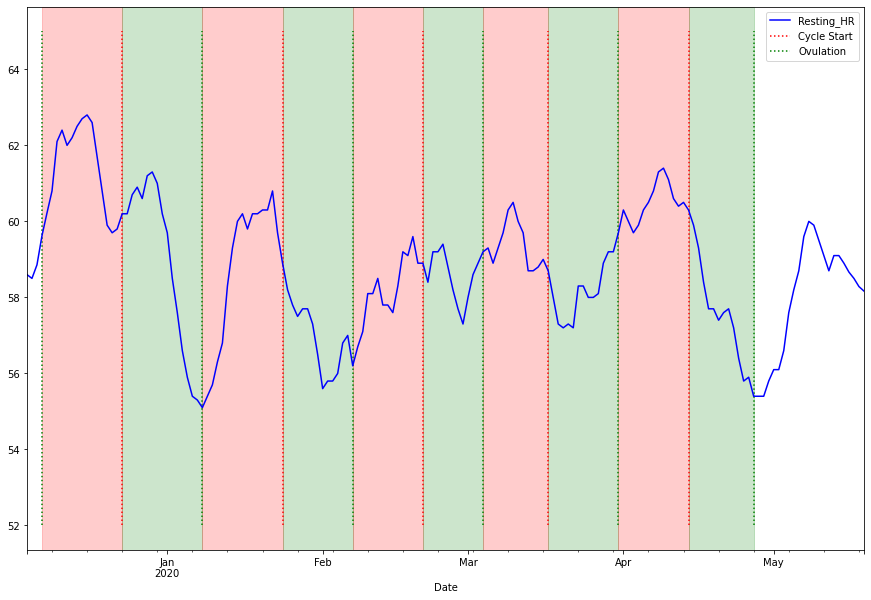

In [0]:
mc = read_menstrual('81041029_MenstrualCycles.json')
mc = append_mc(mc, '2020-05-11')
mc = cleanup_mc(mc)
mc = date_datetime(mc, 'startDate')
mc = length_ovulation(mc)
mc = data_for_plot(mc)

HR = read_HR()
HR = cleanup_HR(HR)
HR = rolling_HR(HR, 10)
HR = date_datetime(HR, 'Date')

plotting(HR, mc, 'Date', 'startDate', 'Ovulation', 'Resting_HR')